<a href="https://colab.research.google.com/github/xJusTox/DMC_MachineLearning/blob/main/EAD_SEG_y_CLASIF_APROB_TC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data.csv')

In [4]:
import os
print(os.getcwd())

/content


In [5]:
df.head()
#VARIABLES DE LA DATA: SEXO, TIENEN CARRO O NO, POSEEN UNA PROPIEDAD O NO, CANTIDAD DE NIÑOS, INGRESOS, TIPO DE INGRESOS, NIVEL EDUCATIVO, ESTADO CIVIL, TIPO DE VIVIENDA, FECHA DE NACIMIENTO, EXP. LABORAL, FLAG CELULAR, CELULAR DE TRABAJO, CELULAR PROPIO, CORREO, OCUPACION, CANTIDAD DE MIEMBROS FAMILIARES

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [6]:
df.info()
#SE PUEDE OBSERVAR QUE HAY 438557 DATOS EN GENERAL, PERO EN TIPO DE OCUPACION HAY DATOS NULOS

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [7]:
df.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


In [8]:
null_values = df.isnull().sum()
print(null_values)
#EXISTEN 134203 VALORES NULOS EN TIPO DE OCUPACION

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64


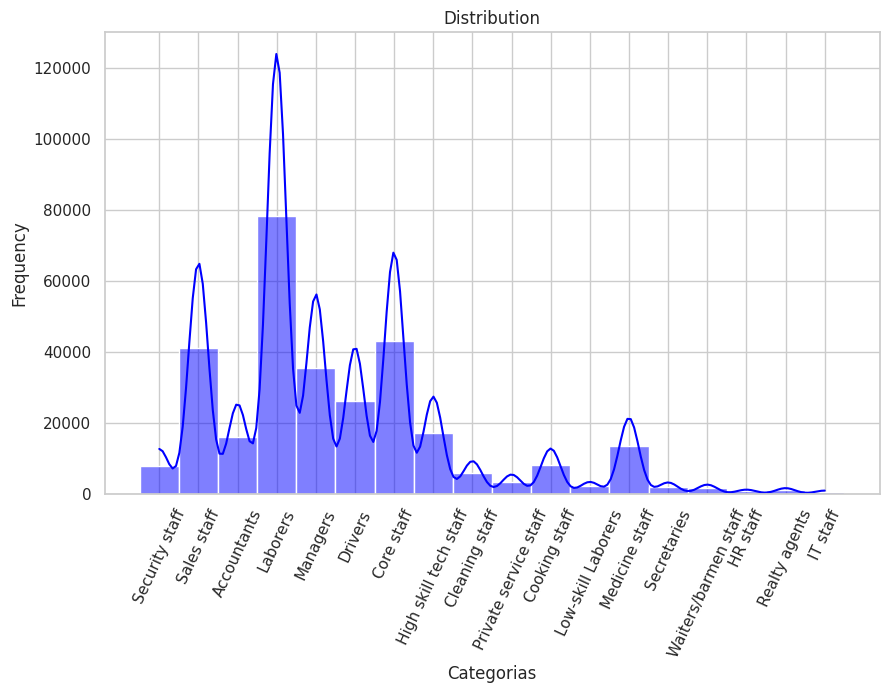

In [15]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(df['OCCUPATION_TYPE'], bins=30, kde=True, color='blue')
plt.title('Distribution')
plt.xlabel('Categorias')
plt.ylabel('Frequency')
plt.xticks(rotation=65)
plt.show()
#NO SE PODRIA USAR LA MEDIA DE LOS DATOS YA QUE EL TIPO DE OCUPACION ES UNA VARIABLE CATEGORICA

In [19]:
missing_count = df['OCCUPATION_TYPE'].isnull().sum()
total_count = df['OCCUPATION_TYPE'].shape[0]
print(f'Missing values: {missing_count} ({(missing_count / total_count) * 100:.2f}%)')
#LA CANTIDAD DE DATOS FALTANTES CORRESPONDE AL 30% Y NO SERIA CONVENIENTE ELIMINARLOS

Missing values: 134203 (30.60%)


In [27]:
df.groupby('NAME_INCOME_TYPE')['OCCUPATION_TYPE'].value_counts()
#OBSERVAMOS LA RELACION ENTRE LOS TIPOS DE INGRESOS Y LOS TIPOS DE OCUPACION

NAME_INCOME_TYPE      OCCUPATION_TYPE     
Commercial associate  Laborers                18359
                      Managers                14420
                      Sales staff             13870
                      Core staff               9453
                      Drivers                  6717
                                              ...  
Working               Secretaries              1157
                      Waiters/barmen staff     1045
                      Realty agents             539
                      HR staff                  415
                      IT staff                  309
Name: count, Length: 68, dtype: int64

In [28]:
df['AMT_INCOME_TOTAL'].describe()
#TAMBIEN SE PODRIA USAR LA VARIABLE DE INGRESOS PARA LA IMPUTACION DE DATOS FALTANTES

,AMT_INCOME_TOTAL
count,4.385570e+05
mean,1.875243e+05
std,1.100869e+05
min,2.610000e+04
25%,1.215000e+05
50%,1.607805e+05
75%,2.250000e+05
max,6.750000e+06


In [30]:
df['income_category'] = pd.qcut(df['AMT_INCOME_TOTAL'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
def fill_missing_occupation(group):
    most_common = group['OCCUPATION_TYPE'].mode()[0] if not group['OCCUPATION_TYPE'].mode().empty else 'Unknown'
    group['OCCUPATION_TYPE'] = group['OCCUPATION_TYPE'].fillna(most_common)
    return group
df = df.groupby(['income_category', 'NAME_INCOME_TYPE']).apply(fill_missing_occupation)
#SE IMPUTA LOS DATOS FALTANTES AGRUPANDOLOS CON CATEGORIAS DE QUARTILES DE LOS INGRESOS Y TAMBIEN CON LA VARIABLE DE TIPO DE INGRESOS

<ipython-input-30-4fabb3aec834>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = df.groupby(['income_category', 'NAME_INCOME_TYPE']).apply(fill_missing_occupation)


In [32]:
print(df['OCCUPATION_TYPE'].isnull().sum())
df['OCCUPATION_TYPE'].value_counts()
#SE OBSERVA QUE YA NO HAY DATOS NULOS EN LA VARIABLE TIPO DE OCUPACION

0


,count
OCCUPATION_TYPE,
Laborers,175028
Core staff,66435
Managers,49469
Sales staff,41098
Drivers,26090
High skill tech staff,17289
Accountants,15985
Medicine staff,13520
Cooking staff,8076


In [33]:
null_values = df.isnull().sum()
print(null_values)
#EFECTIVAMENTE NO EXISTEN VALORES NULOS

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
income_category        0
dtype: int64


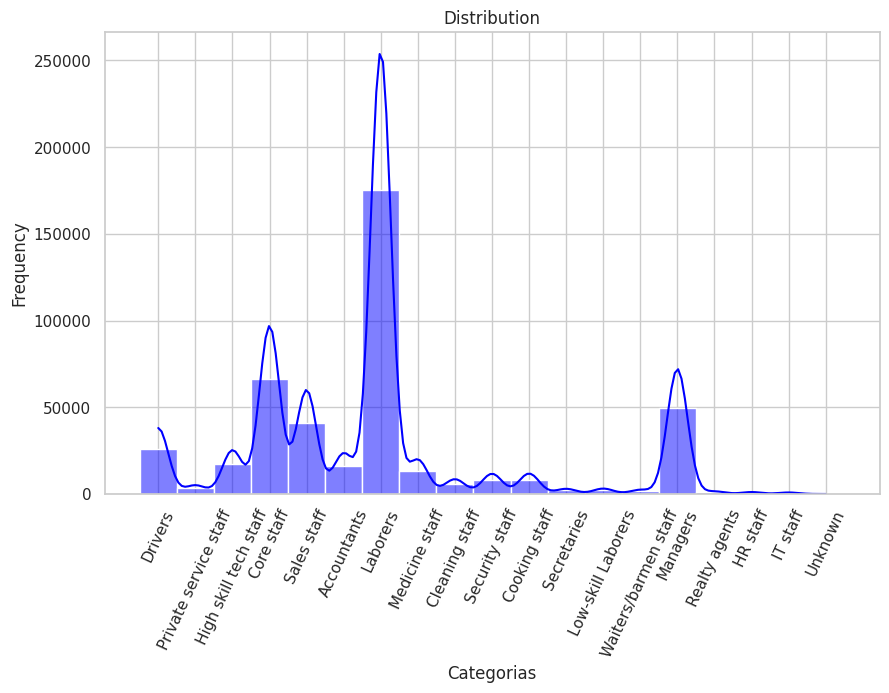

In [34]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(df['OCCUPATION_TYPE'], bins=30, kde=True, color='blue')
plt.title('Distribution')
plt.xlabel('Categorias')
plt.ylabel('Frequency')
plt.xticks(rotation=65)
plt.show()
#AHORA LA FIGURA DE LA DISTRIBUCION HA CAMBIADO. LA COLUMNA DE LABORERS SE INCREMENTO Y MANTIENE LA MAYORIA COMO EN EL GRAFICO PASADO PERO EL RESTO DE LOS TIPOS DE OCUPACIONES SE HAN MODIFICADO